![](Cintilla.png)

# Analisis Inteligentes de Datos
## Arboles de Decision COVID-19-MX

## Nombre Del Docente
### Pizarro Gurrola Ruben

## Nombre Del Alumno
### Karla Jelitza Bermudez Nuñez
    


### Objetivo
Aplicar el algoritmo de regresión logística para clasificar si una persona sobrevivio o no al COVID-19 en mexico.

### Descripcion
Se utiliza mediante comandos e instrucciones de Python el algoritmo de regresión logística que funcione con un conjunto de datos de personas en mexico relacionado con el Covid-19 para clasificar si una persona sobrevivio o no al COVID-19 en Mexico, influyendo el sexo, edad y varias enfermedades.

### Fundamento teórico

¿Que son los algortimos de clasificación?

¿En dónde se aplican los algoritmos de clasificación?

¿Algunos ejemplos de aplicación de algoritmos de clasificación?

A partir de un conjunto de datos de entrada (características), se puede clasificar conforme a una etiqueta de salida, se puede utilizar un algoritmo regresión logística para claisificar datos. 

La regresión logística es un algoritmo supervisado y se utiliza para clasificación. Las etiquetas pueden ser “SI/NO”: binario o un número finito de "valores" o "etiquetas" o "clases": múltiple. [Bagnato, 2020]

Un algorimto de clasificación es el proceso de identificar categoría de observación (establecido) sobre la base de la formación del conjunto de datos que contiene observaciones de las cuales las
categorías son desconocidas [Suca, 2016].

### 1. Cargar librerias

In [1]:
import pandas as pd
corona = pd.read_csv("200723COVID19MEXICO.csv", encoding= 'unicode_escape')

### 2. Cargar Datos

In [2]:
corona

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879603,2020-07-23,1af1ae,1,12,19,2,19,19,39,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
879604,2020-07-23,193226,1,3,26,2,26,26,30,2,...,2,1,2,1,1,3,99,MÃ©xico,99,2
879605,2020-07-23,0fe94e,2,12,24,1,24,24,28,1,...,1,2,2,2,2,3,99,MÃ©xico,99,97
879606,2020-07-23,118851,2,12,9,1,9,9,5,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97


### 3. Descripcion de los Datos

In [3]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 35 columns):
FECHA_ACTUALIZACION    879608 non-null object
ID_REGISTRO            879608 non-null object
ORIGEN                 879608 non-null int64
SECTOR                 879608 non-null int64
ENTIDAD_UM             879608 non-null int64
SEXO                   879608 non-null int64
ENTIDAD_NAC            879608 non-null int64
ENTIDAD_RES            879608 non-null int64
MUNICIPIO_RES          879608 non-null int64
TIPO_PACIENTE          879608 non-null int64
FECHA_INGRESO          879608 non-null object
FECHA_SINTOMAS         879608 non-null object
FECHA_DEF              879608 non-null object
INTUBADO               879608 non-null int64
NEUMONIA               879608 non-null int64
EDAD                   879608 non-null int64
NACIONALIDAD           879608 non-null int64
EMBARAZO               879608 non-null int64
HABLA_LENGUA_INDIG     879608 non-null int64
DIABETES               879608

In [4]:
corona['SOBREVIVIO'] = corona['FECHA_DEF'].apply(lambda toLabel: 0 if toLabel =='9999-99-99' else 1)

In [5]:
y_target = corona["SOBREVIVIO"].values

In [6]:
corona.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,SOBREVIVIO
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,MÃ©xico,99,2,0
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,MÃ©xico,99,2,0


In [7]:
columns = ["SEXO", "EDAD", "EMBARAZO", "INTUBADO" ,"NEUMONIA", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO","UCI"]

X_input = corona[list(columns)].values

### Datos de entrenamiento y validacion

In [8]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train = clf_train.fit(X_input, y_target)

#### Evaluar el modelo

In [9]:
clf_train.score(X_input,y_target)

0.9433054269629199

In [10]:
clasificacion=['No Sobrevive', 'Sobrevive']

In [11]:
import sklearn
#from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [12]:
!dot -Tpng covid.dot -o covid.png

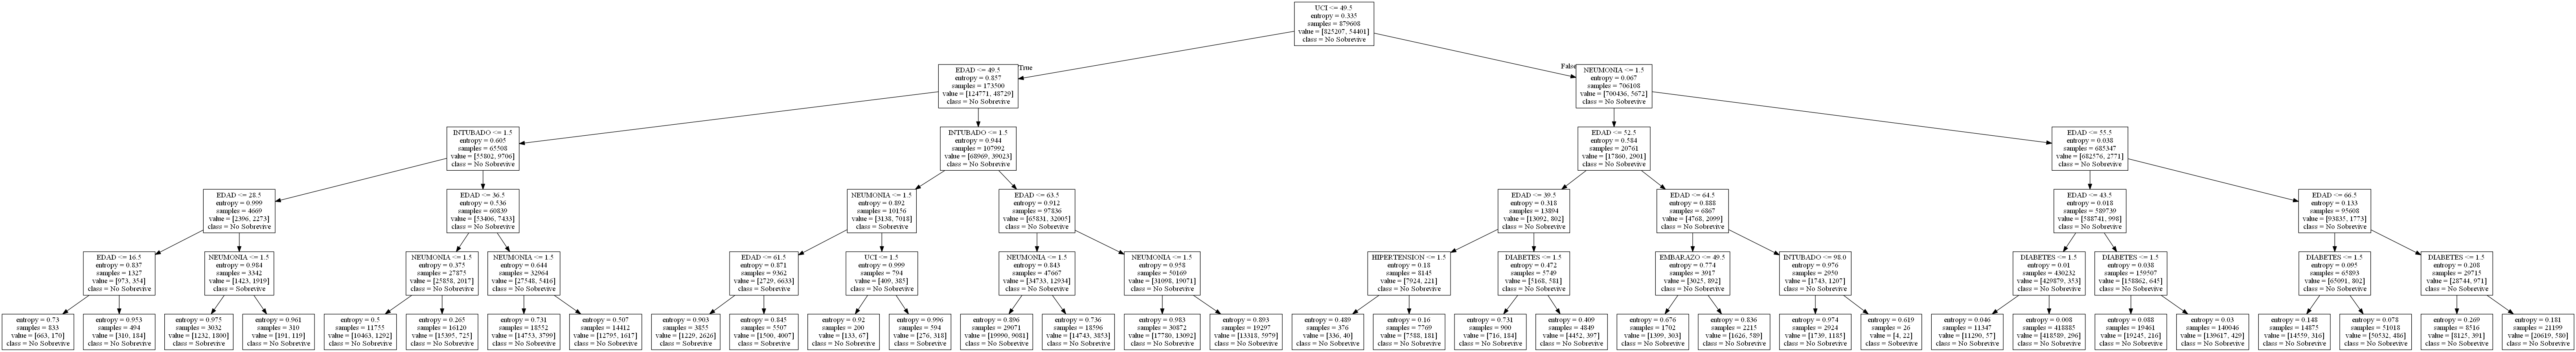

In [13]:
from IPython.display import Image

#display the decison tree graphic
Image("covid.png")

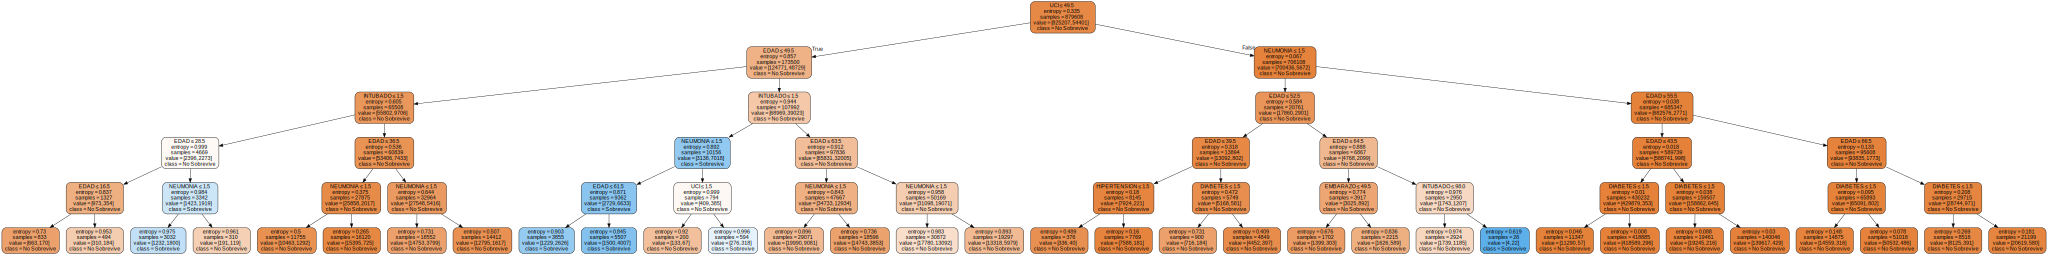

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=clasificacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("CovidColor", format='png')
graph

In [15]:
y_target = corona["SOBREVIVIO"].values

In [16]:
columns = ["SEXO", "EDAD", "EMBARAZO", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO"]

X_input = corona[list(columns)].values

In [17]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train = clf_train.fit(X_input, y_target)

In [18]:
clf_train.score(X_input,y_target)

0.9381531318496421

In [19]:
clasificacion=['No Sobrevive', 'Sobrevive']

In [20]:
import sklearn
#from sklearn.externals.six import StringIO
with open("covid2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [21]:
!dot -Tpng covid2.dot -o covid2.png

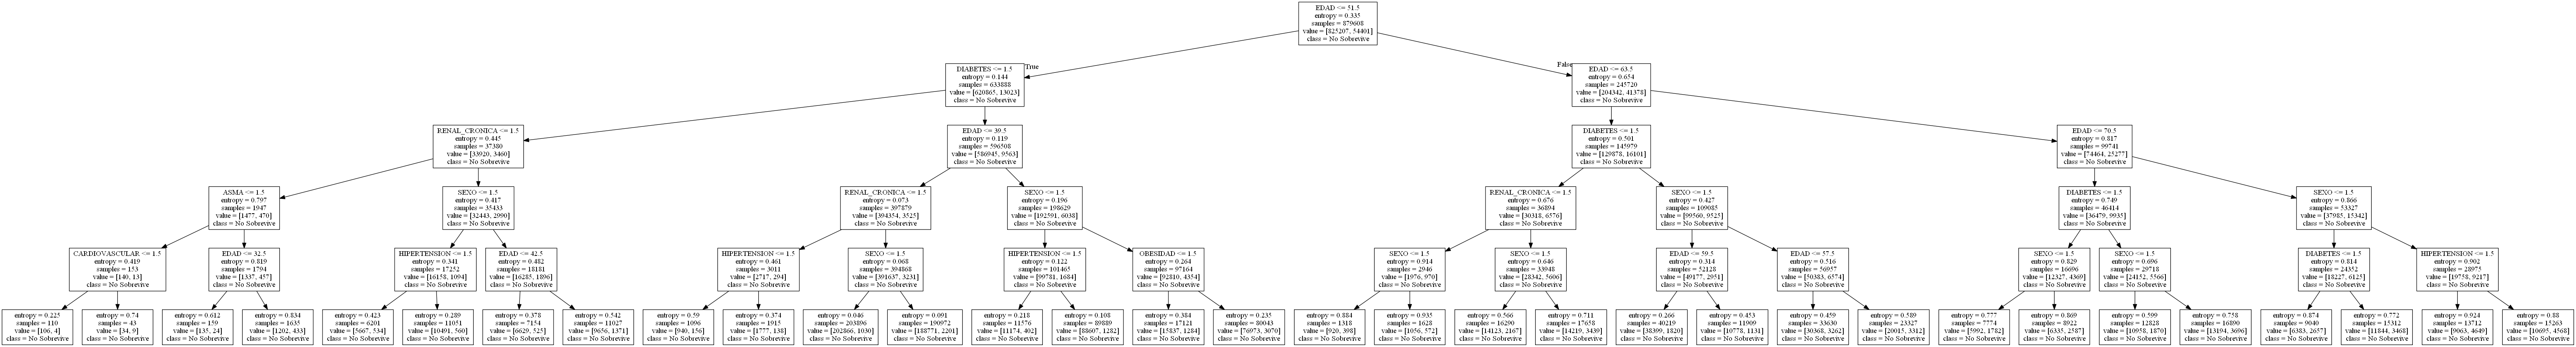

In [22]:
from IPython.display import Image

#display the decison tree graphic
Image("covid2.png")

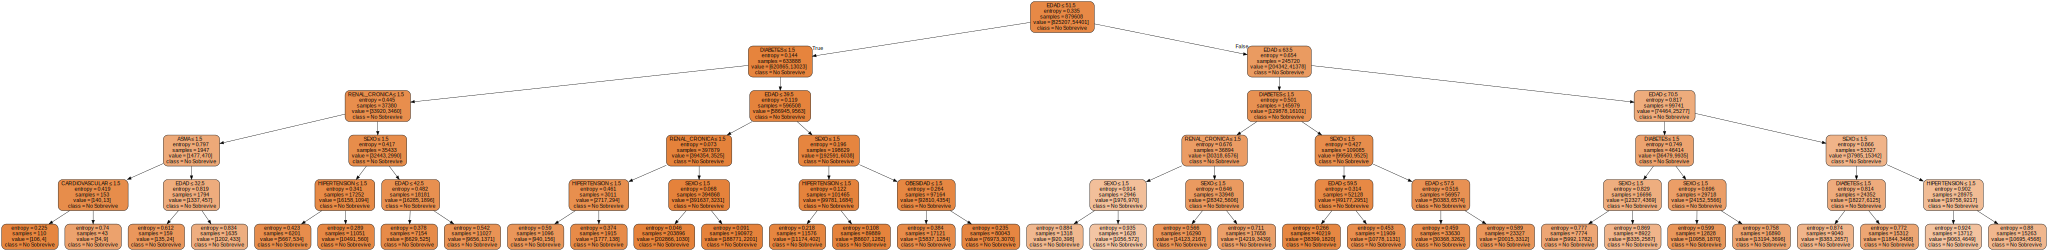

In [23]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=clasificacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("CovidColor2", format='png')
graph

### Interpretacion

**Uso de arboles de decision de datos COVID-19 en mexico, en este conjunto de datos se busca saber que tipo de personas sobrevivio al covid-19. Lo primero que se utilizo como variable dependiente es la "fecha de defuncion" porque es lo primero que hay que identificar. Se seleccionaron las variables SEXO", "EDAD", "EMBARAZO", "INTUBADO" ,"NEUMONIA", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR","OBSIDAD","RENAL_CRONICA","TABAQUISMO","UCI". Se saca el porcentaje de entrenamiento y validacion. Pr medio de la funcion del arbol de decision se genero la raiz principal con 2 mas como principales y cada una se deriva de otras dos ramas. La rama principal es Unidad de Cuidados intensivos derivandose principalmente en la Neumonia en (true/false), a partir de ahi se cuestiona la edad, donde se analiza si la persona fue intubada o no.
En donde influye que los UCI y la edad es las principales variables para identificar el porque de las defunciones de las personas por el virus del COVID-19. 
**